In [4]:
from sagemaker import get_execution_role
import boto3
import pandas as pd
import io
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

role = get_execution_role()

bucket = 'projeto-integrador-grupo-b-refined'
subfolder = 'amostra-treinamento/'
full_df=pd.DataFrame()


conn = boto3.client('s3')
contents = conn.list_objects(Bucket=bucket, Prefix=subfolder)['Contents']
for f in contents:
    response = conn.get_object(Bucket=bucket, Key=f['Key'])
    body = response['Body']
    df = pd.read_parquet(io.BytesIO(body.read()))
    full_df=full_df.append(df,ignore_index=True)

In [5]:
full_df['IsBenign'].value_counts()

1    10000
0    10000
Name: IsBenign, dtype: int64

In [7]:
colunas = list(full_df)

colunas.remove("Timestamp")
colunas.remove("Label")
colunas.remove("anomesdia")

df_convert = full_df[colunas].astype(np.float32)

In [8]:
df_convert.describe()

,Fwd_IAT_Max,Fwd_Act_Data_Pkts,Fwd_Header_Len,Bwd_Pktsb_Avg,Bwd_IAT_Mean,Idle_Std,Bwd_IAT_Tot,Fwd_Pktss,Active_Min,Subflow_Bwd_Byts,...,Subflow_Fwd_Pkts,Pkt_Len_Min,ACK_Flag_Cnt,Init_Bwd_Win_Byts,Bwd_Header_Len,Bwd_IAT_Std,Fwd_Seg_Size_Min,Pkt_Size_Avg,Fwd_URG_Flags,Bwd_Pkt_Len_Min
count,20000.0,20000.000000,2.000000e+04,20000.0,2.000000e+04,2.000000e+04,20000.0,2.000000e+04,2.000000e+04,2.000000e+04,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,5700513.0,15.557450,2.135112e+02,0.0,4.891741e+05,9.890381e+04,4343607.0,6.666416e+04,5.028859e+04,2.004806e+03,...,18.289551,6.706250,0.349600,5410.875000,102.897003,5.399633e+05,20.709999,74.463707,0.000100,15.696100
std,15073755.0,1369.395142,1.095728e+04,0.0,3.095592e+06,1.425002e+06,19405702.0,2.300689e+05,1.173574e+06,7.919447e+04,...,1369.425293,19.623295,0.476867,16684.324219,1104.303345,2.455113e+06,8.483187,94.199585,0.009999,41.054947
min,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,4.000000e+01,0.0,0.000000e+00,0.000000e+00,0.0,1.937285e+00,0.000000e+00,0.000000e+00,...,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,20.000000,0.000000,0.000000,0.000000
50%,507.0,0.000000,4.000000e+01,0.0,0.000000e+00,0.000000e+00,0.0,5.913661e+01,0.000000e+00,8.000000e+01,...,2.000000,0.000000,0.000000,0.000000,20.000000,0.000000e+00,20.000000,65.000000,0.000000,0.000000
75%,1164540.5,1.000000,7.200000e+01,0.0,1.537768e+05,0.000000e+00,508870.0,3.868472e+03,0.000000e+00,9.640000e+02,...,3.000000,0.000000,1.000000,219.000000,92.000000,4.607798e+04,20.000000,140.571426,0.000000,0.000000
max,114000000.0,144104.000000,1.152840e+06,0.0,8.361510e+07,4.708644e+07,120000000.0,3.000000e+06,1.057898e+08,9.962926e+06,...,144105.000000,500.000000,1.000000,65535.000000,137252.000000,4.221759e+07,44.000000,1340.015259,1.000000,503.000000


In [9]:
df_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fwd_IAT_Max        20000 non-null  float32
 1   Fwd_Act_Data_Pkts  20000 non-null  float32
 2   Fwd_Header_Len     20000 non-null  float32
 3   Bwd_Pktsb_Avg      20000 non-null  float32
 4   Bwd_IAT_Mean       20000 non-null  float32
 5   Idle_Std           20000 non-null  float32
 6   Bwd_IAT_Tot        20000 non-null  float32
 7   Fwd_Pktss          20000 non-null  float32
 8   Active_Min         20000 non-null  float32
 9   Subflow_Bwd_Byts   20000 non-null  float32
 10  Fwd_Pkt_Len_Max    20000 non-null  float32
 11  Bwd_IAT_Max        20000 non-null  float32
 12  Flow_IAT_Min       20000 non-null  float32
 13  IsBenign           20000 non-null  float32
 14  Subflow_Fwd_Byts   20000 non-null  float32
 15  Dst_Port           20000 non-null  float32
 16  Fwd_Bytsb_Avg      200

In [10]:
contagem_benignos = df_convert.loc[df_convert['IsBenign'] == 1, 'IsBenign'].count()
contagem_malignos = df_convert.loc[df_convert['IsBenign'] == 0, 'IsBenign'].count()
print(f"contagem de de benignos: {contagem_benignos}")
print(f"contagem de malignos: {contagem_malignos}")
print(f"porcentagem de benignos: {contagem_benignos/(contagem_benignos+contagem_malignos)*100}%")
print(f"porcentagem de malignos: {contagem_malignos/(contagem_benignos+contagem_malignos)*100}%")

contagem de de benignos: 10000
contagem de malignos: 10000
porcentagem de benignos: 50.0%
porcentagem de malignos: 50.0%


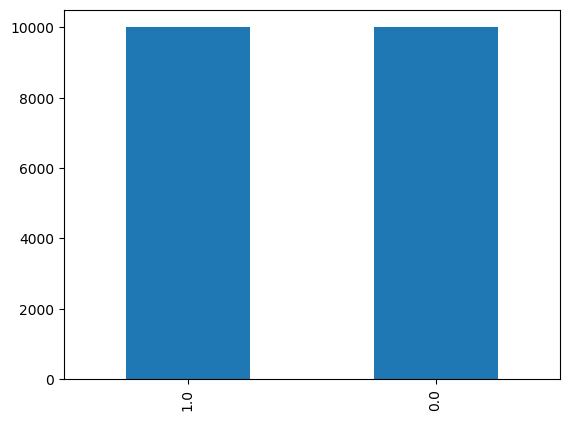

In [13]:
df_convert['IsBenign'].value_counts().plot(kind='bar')
plt.show()

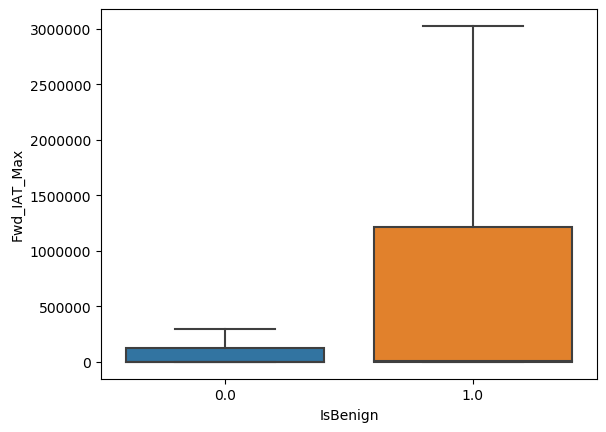

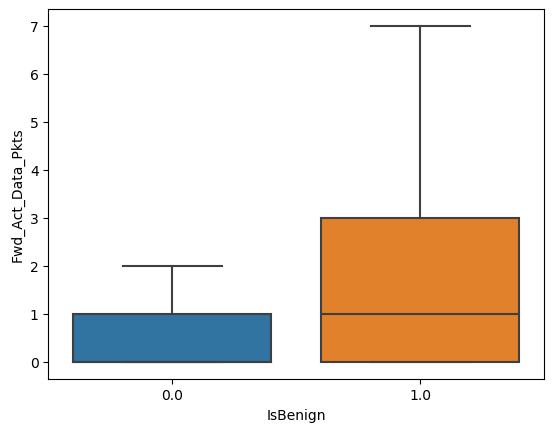

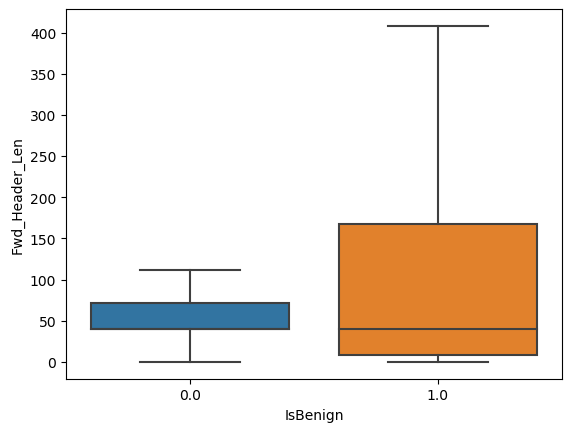

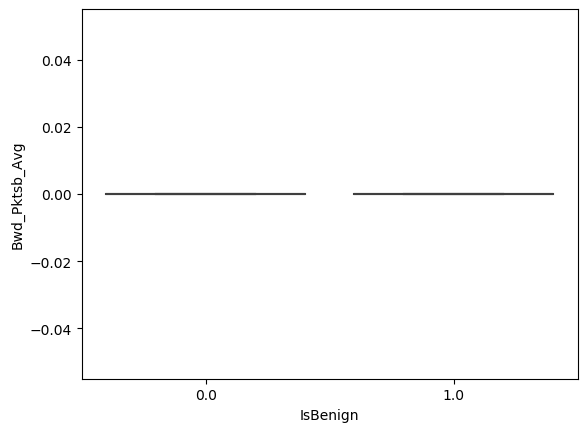

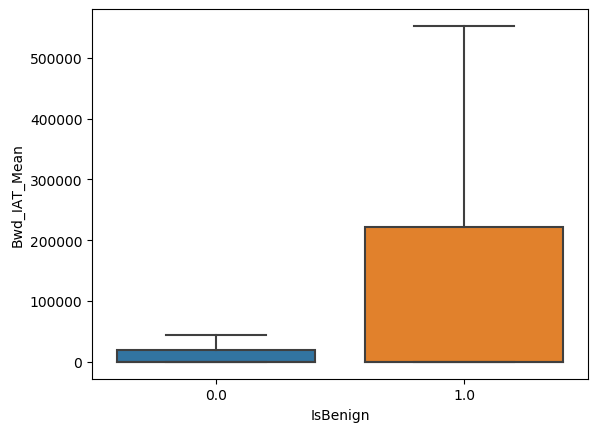

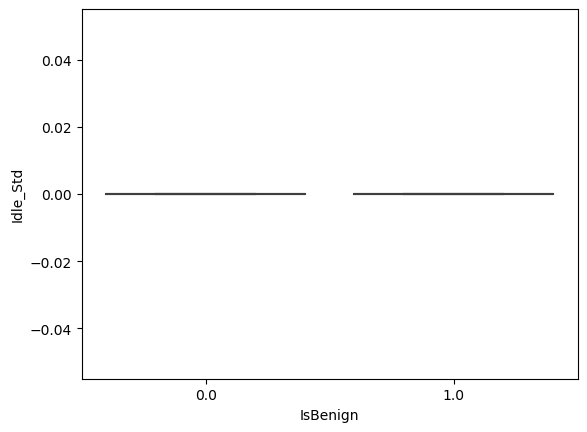

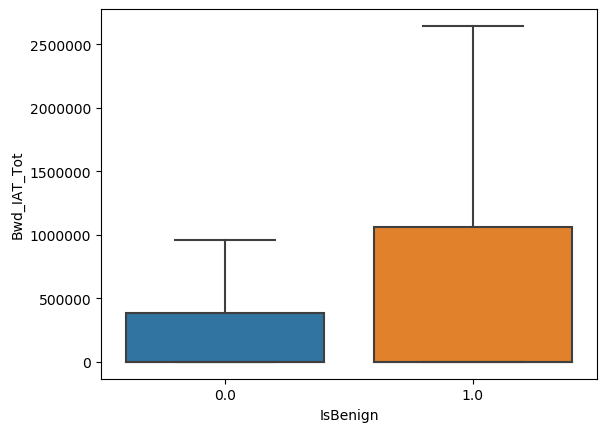

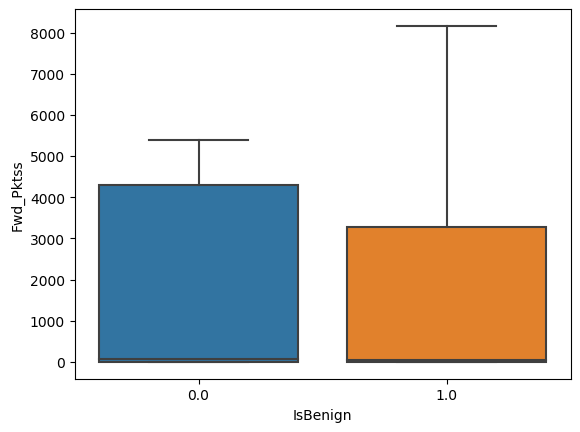

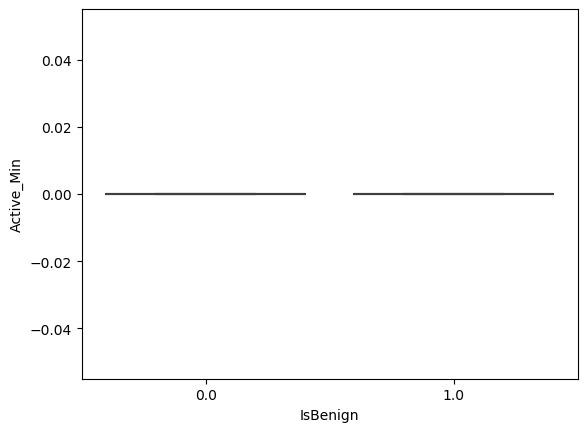

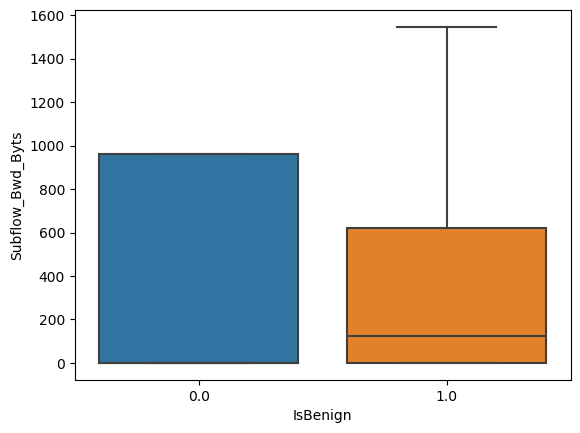

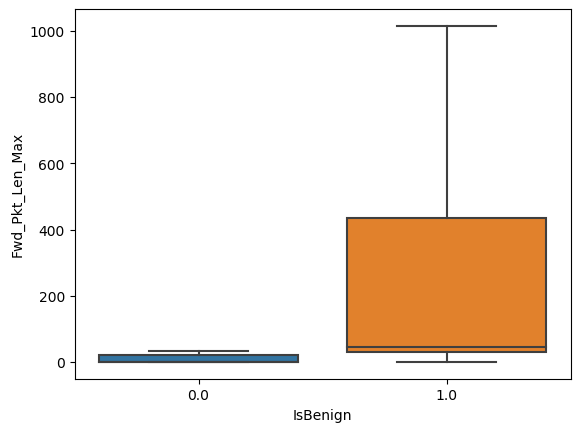

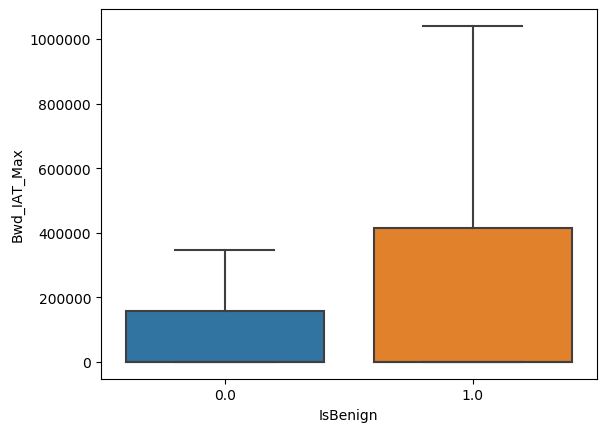

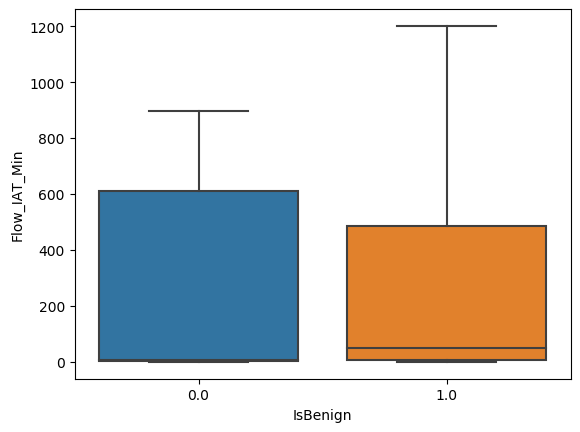

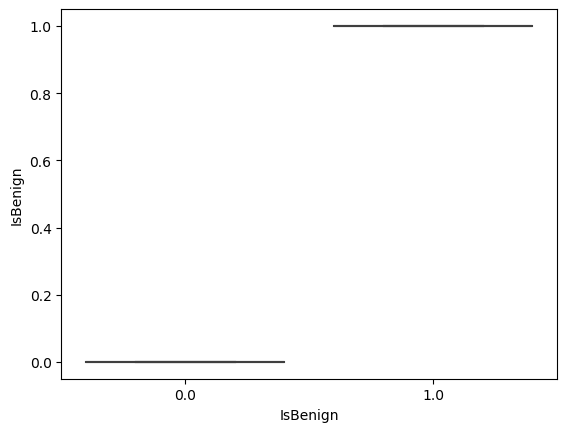

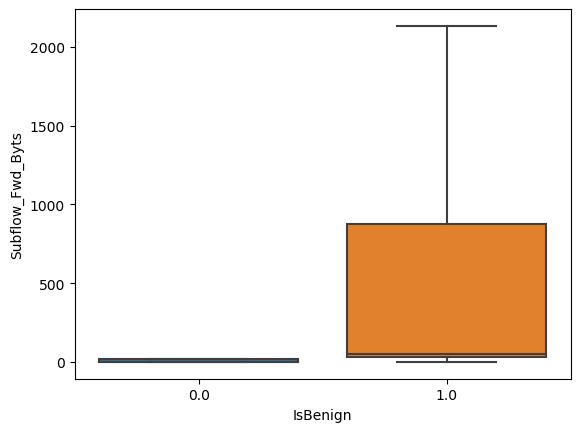

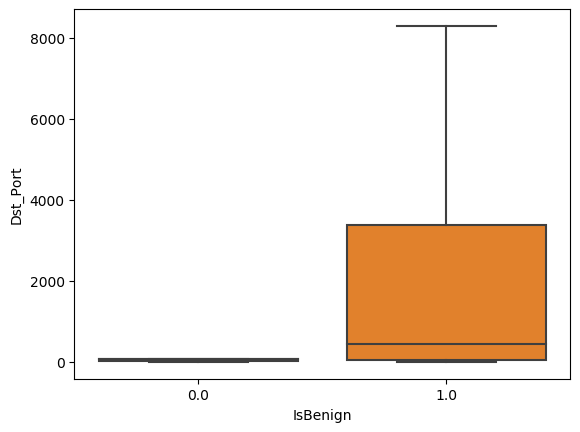

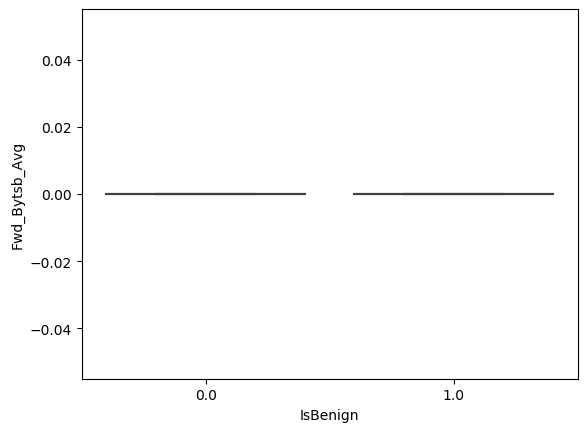

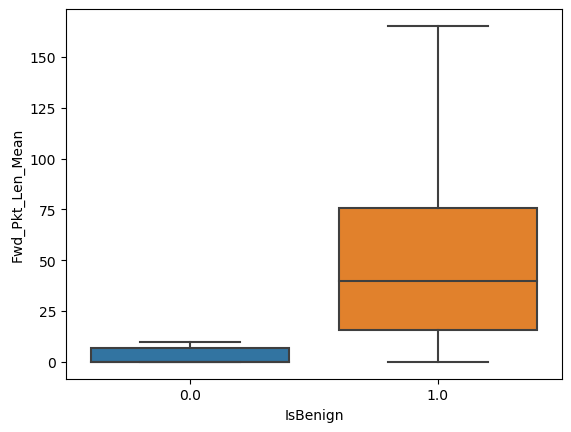

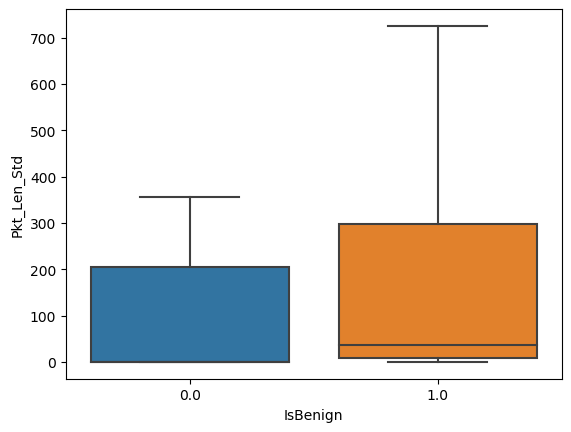

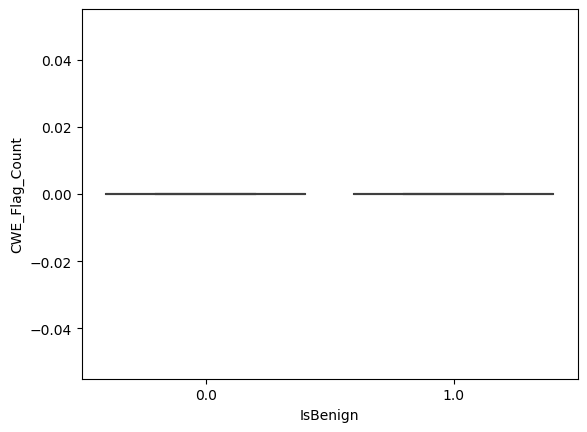

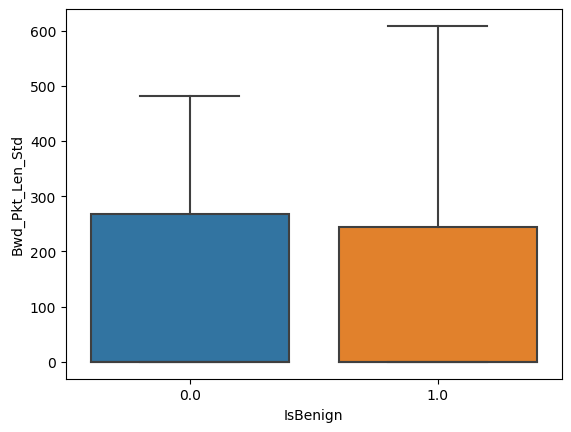

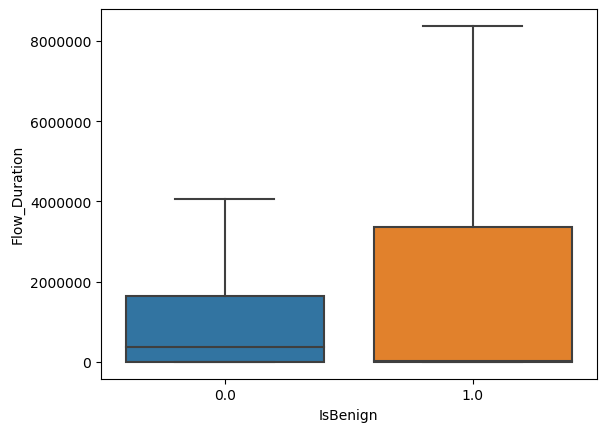

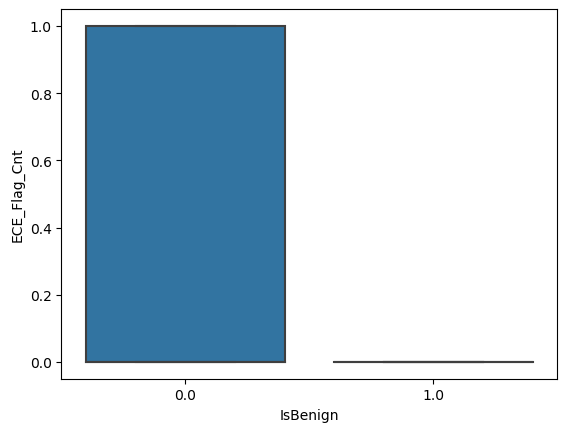

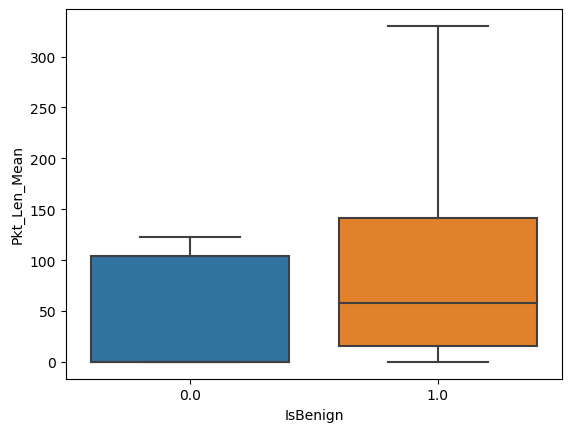

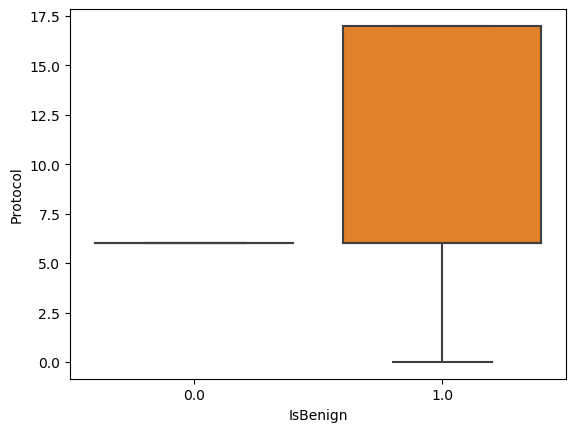

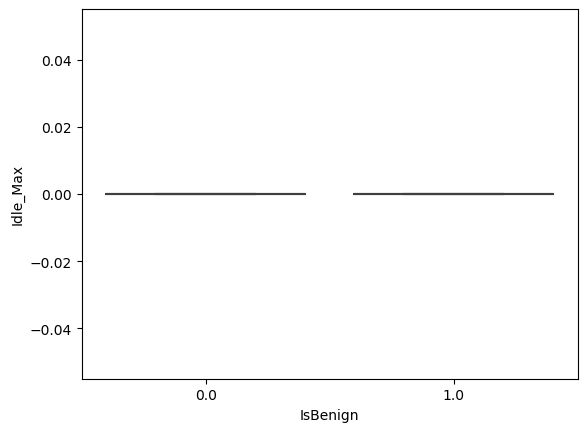

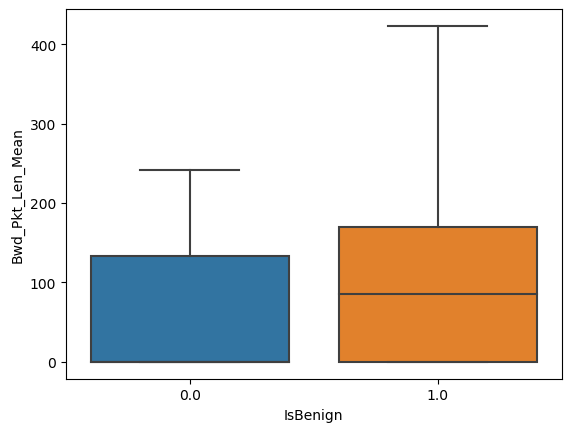

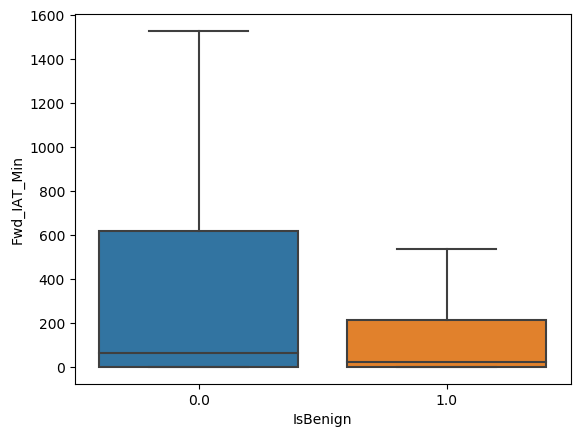

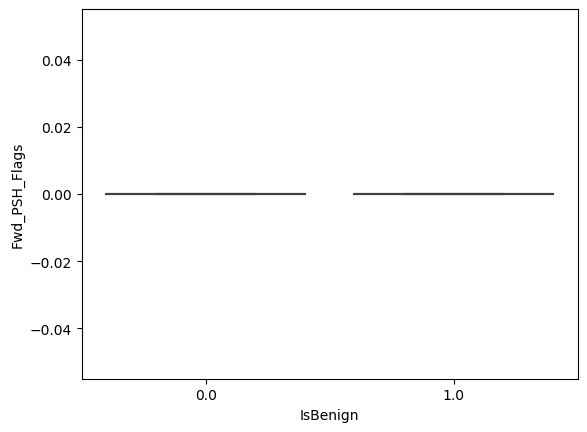

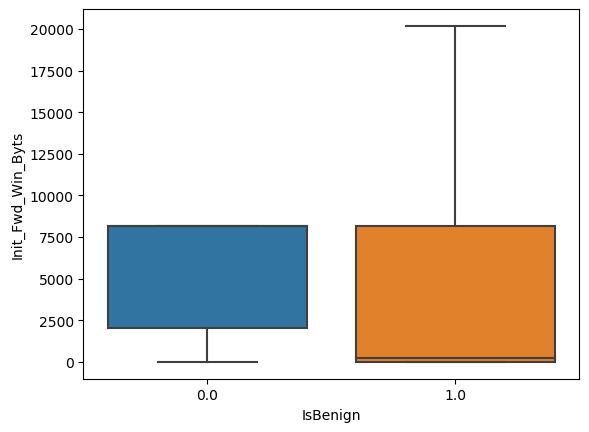

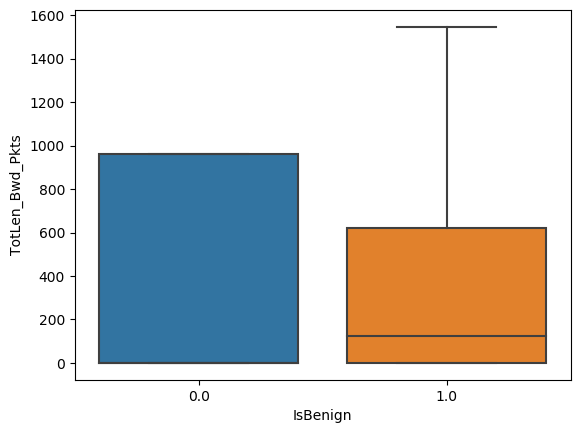

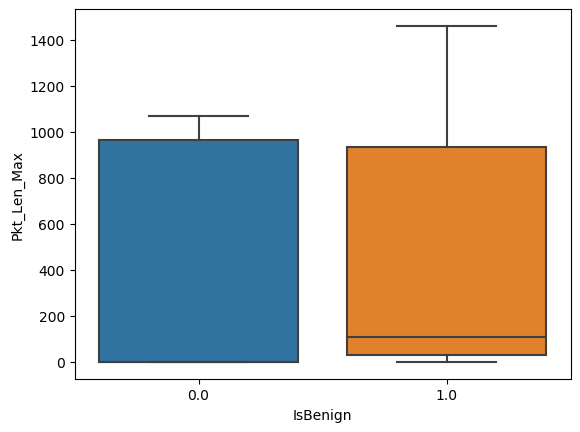

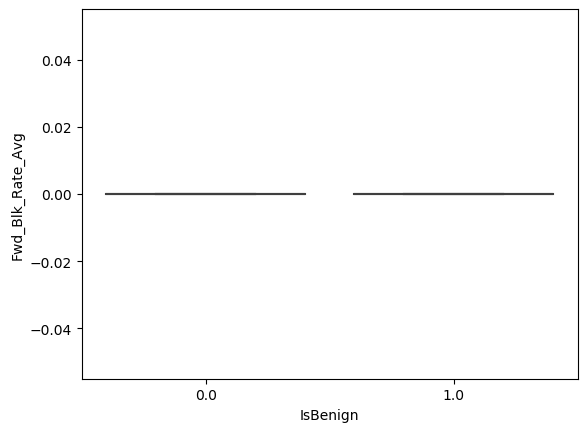

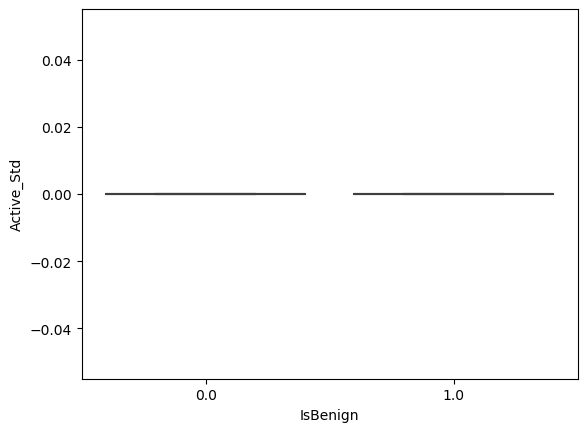

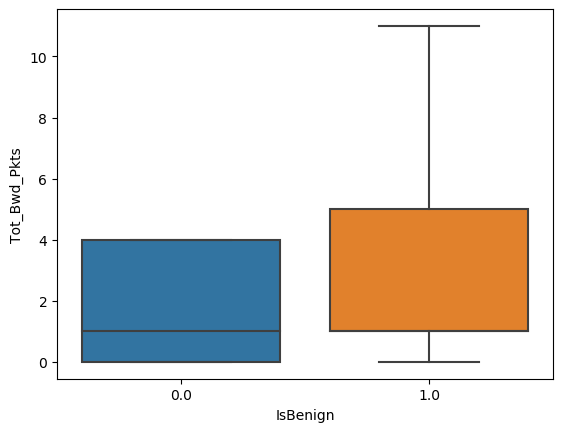

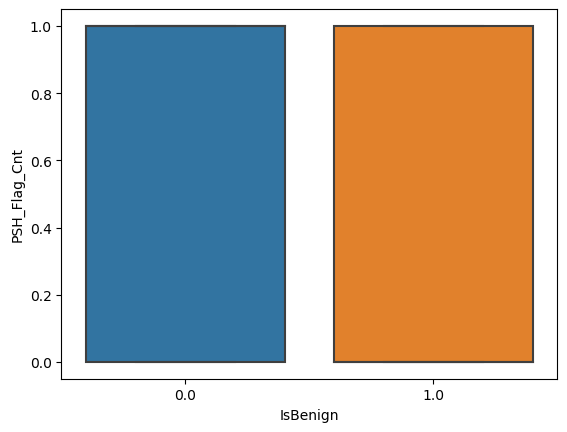

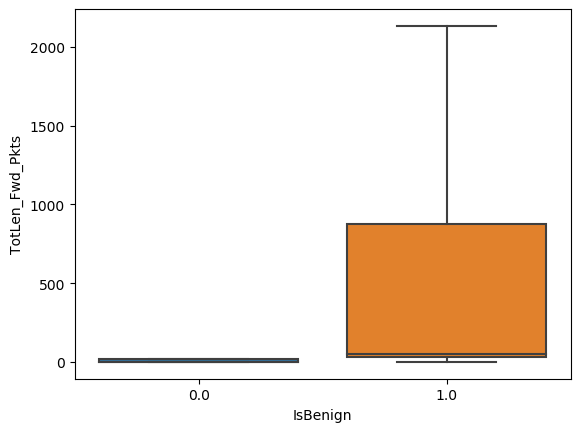

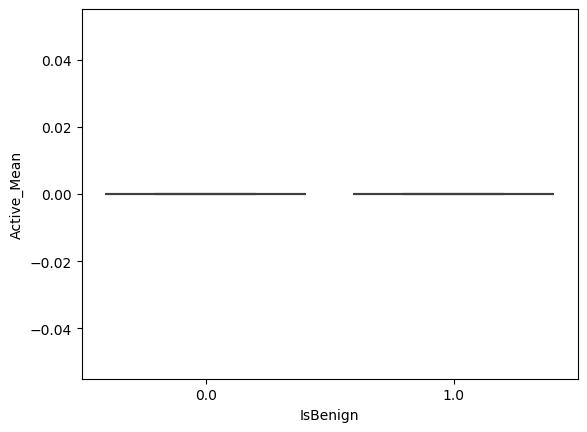

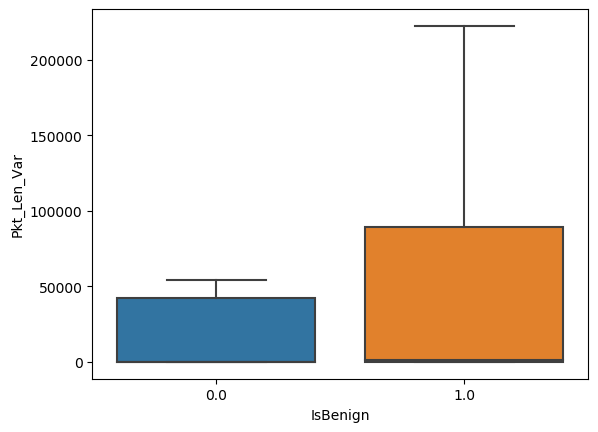

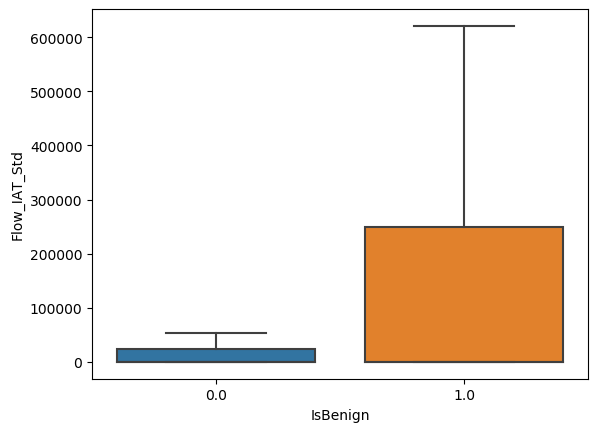

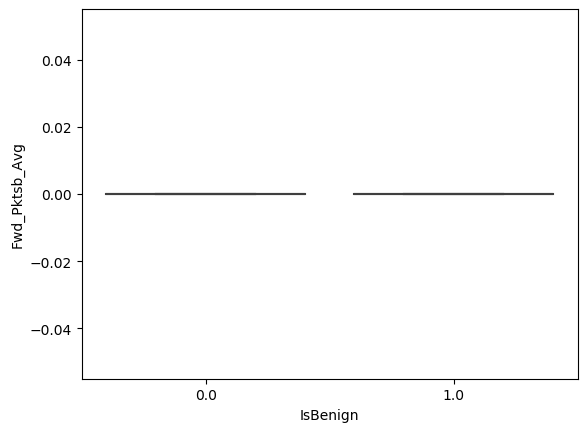

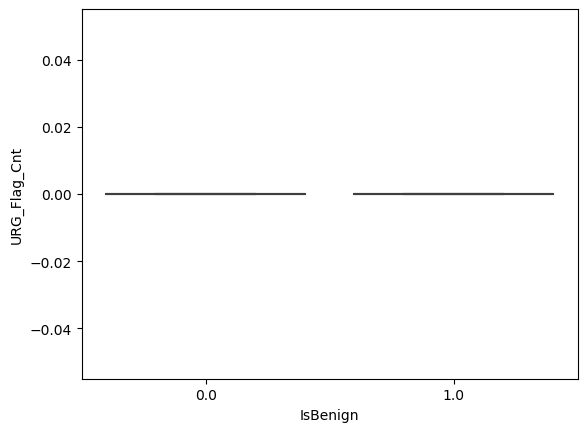

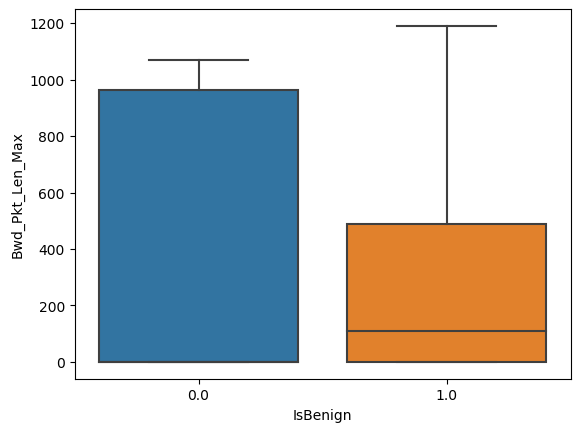

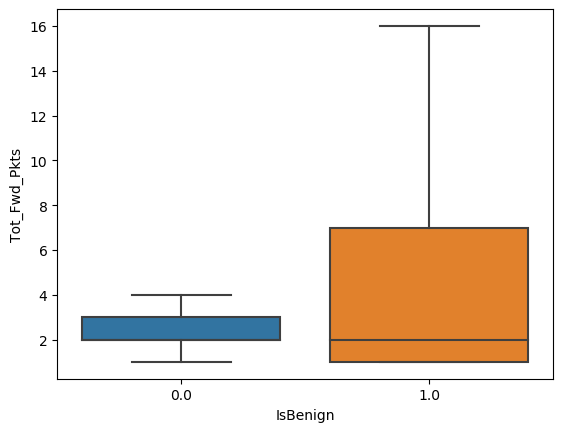

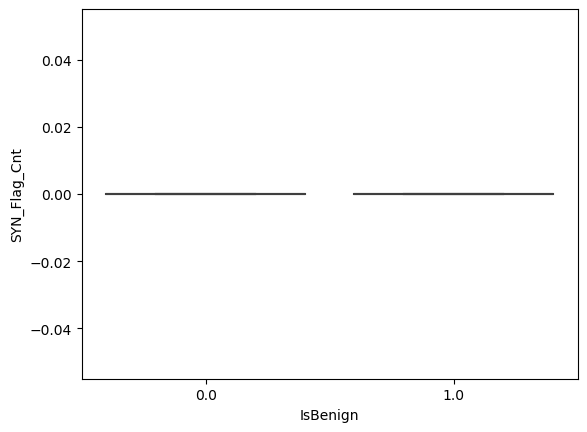

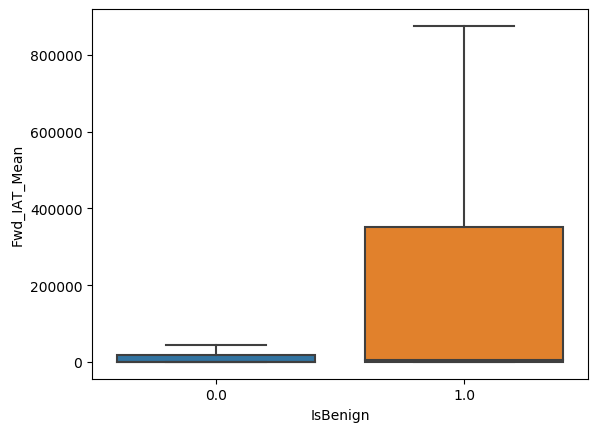

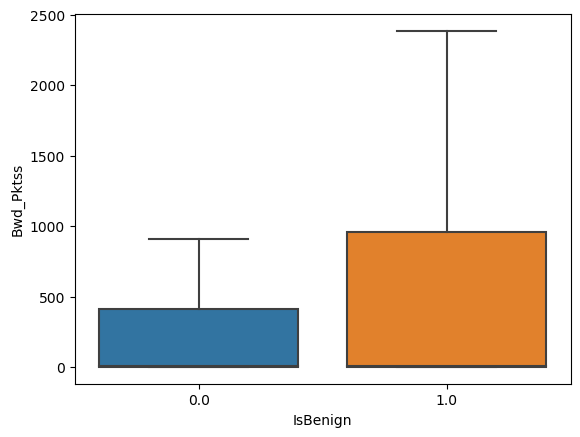

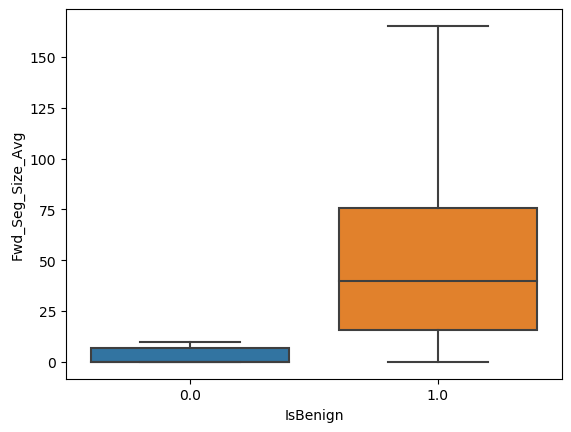

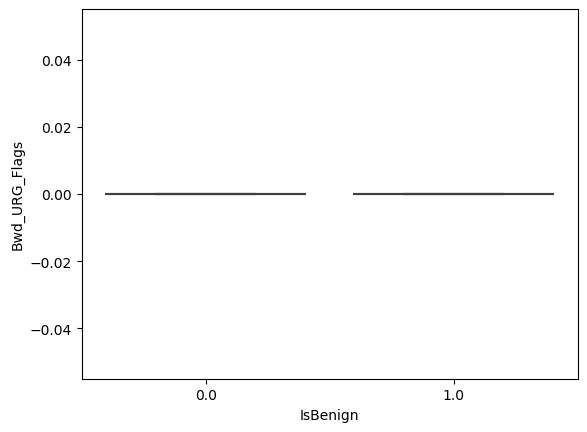

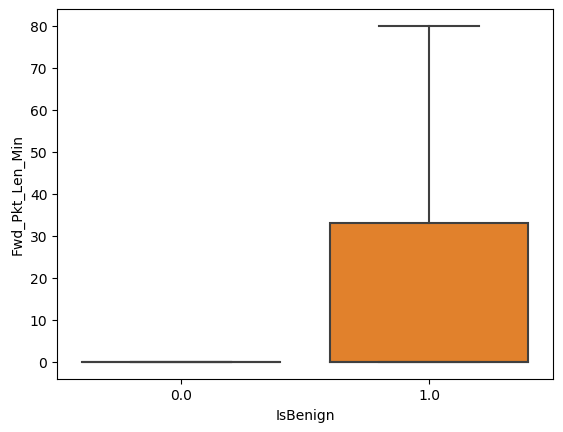

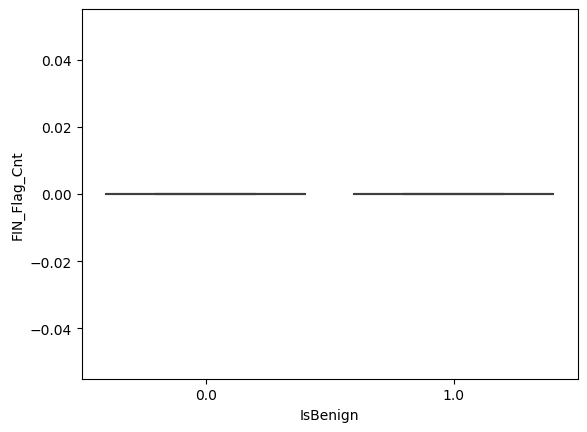

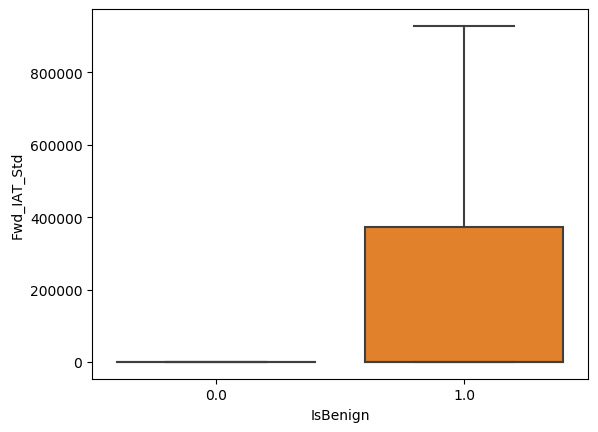

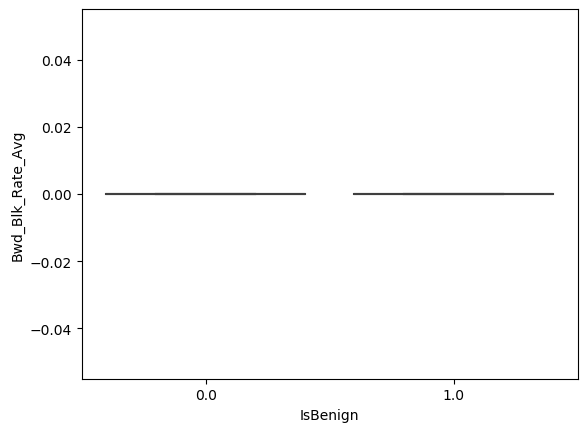

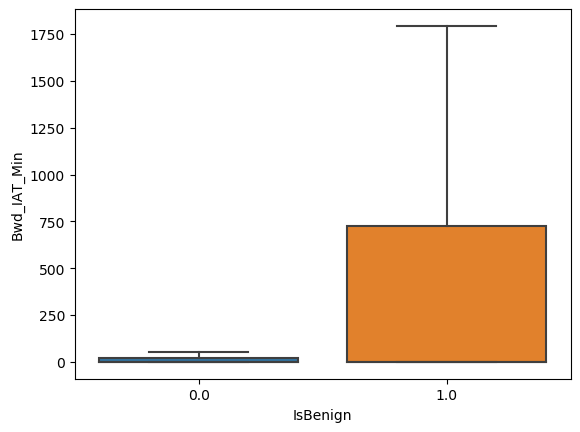

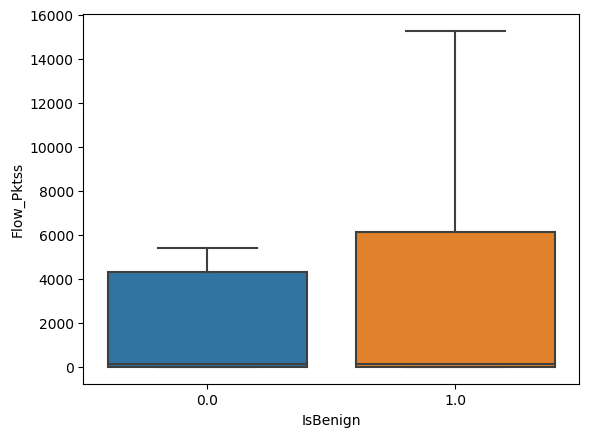

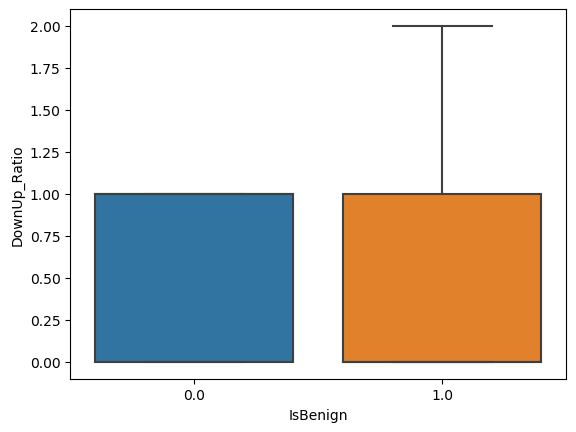

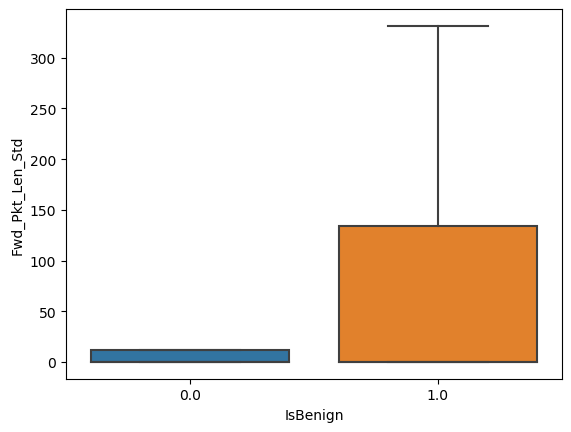

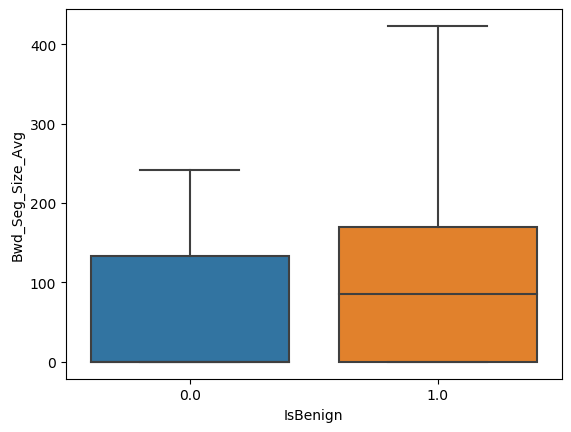

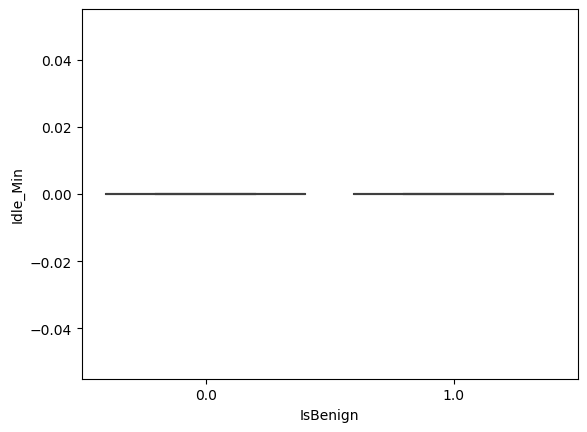

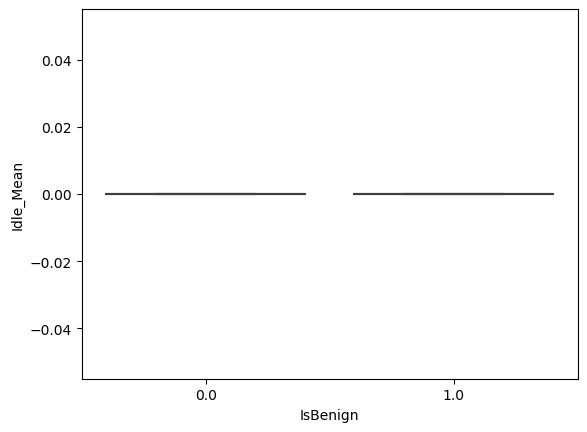

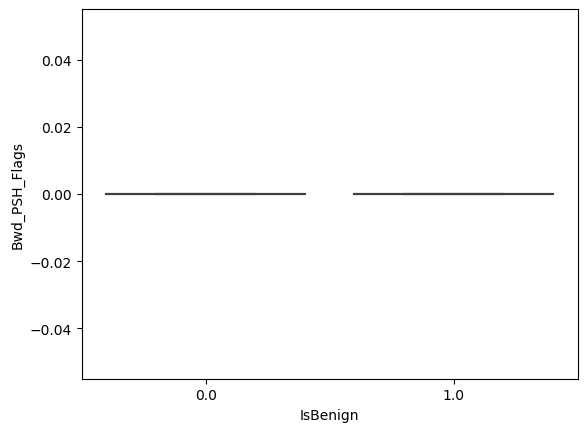

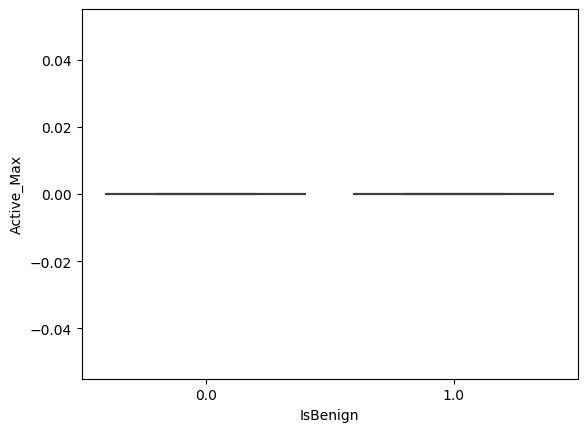

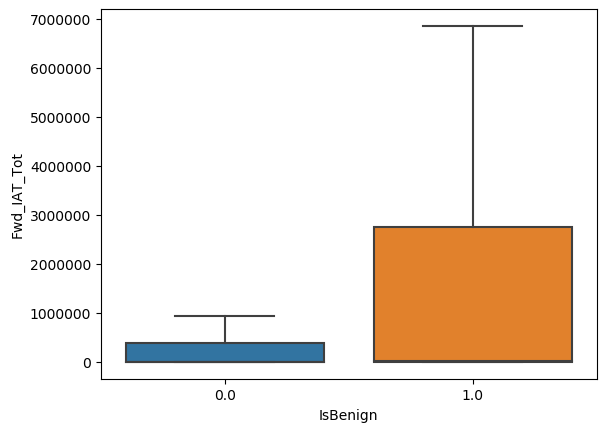

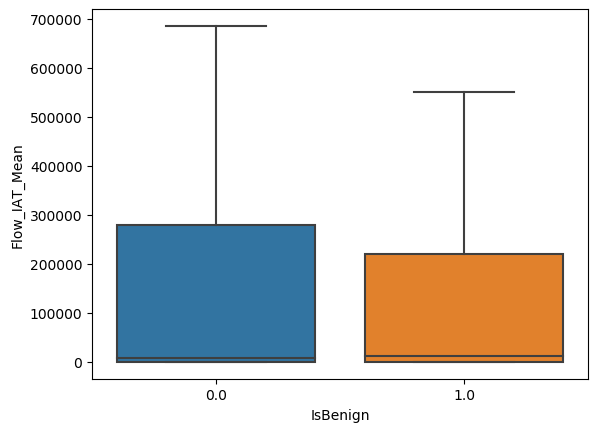

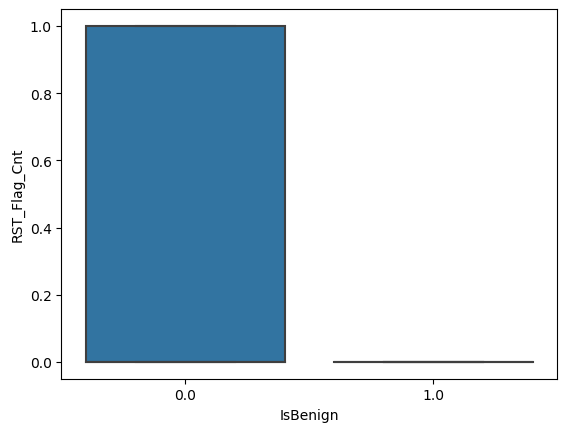

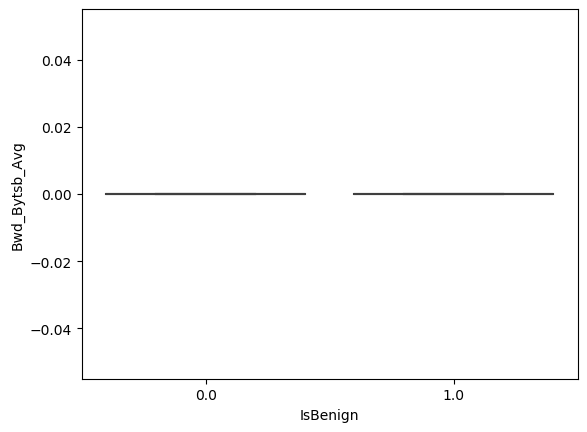

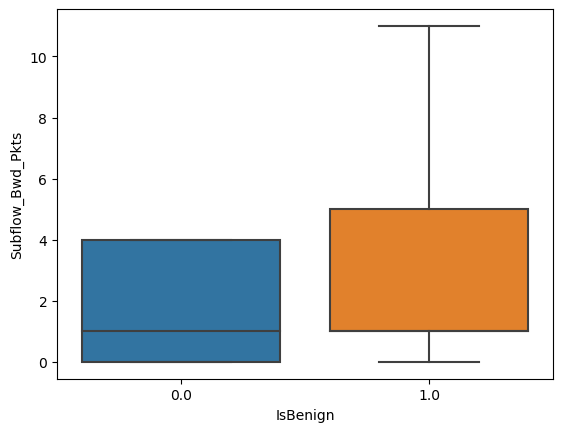

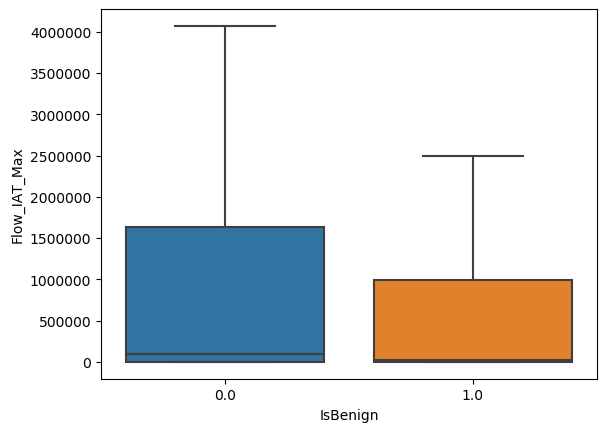

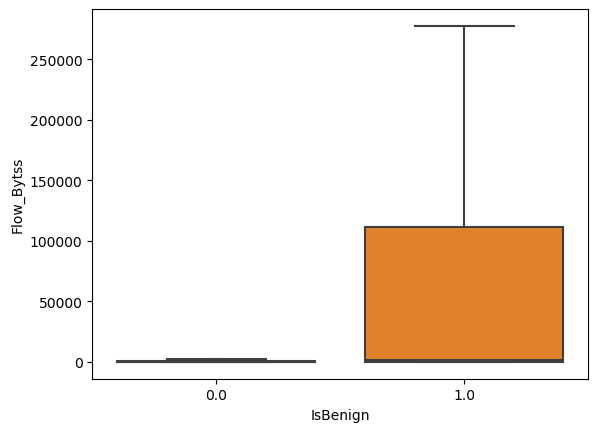

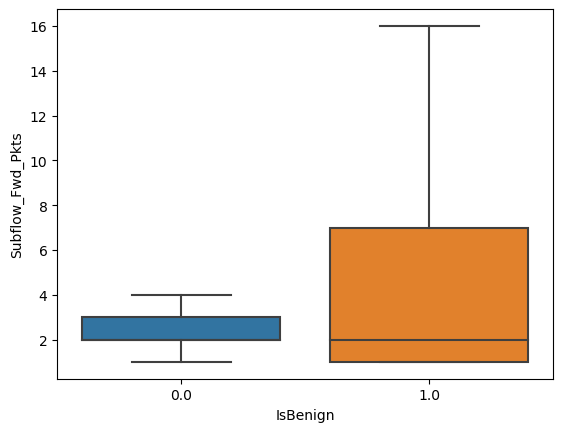

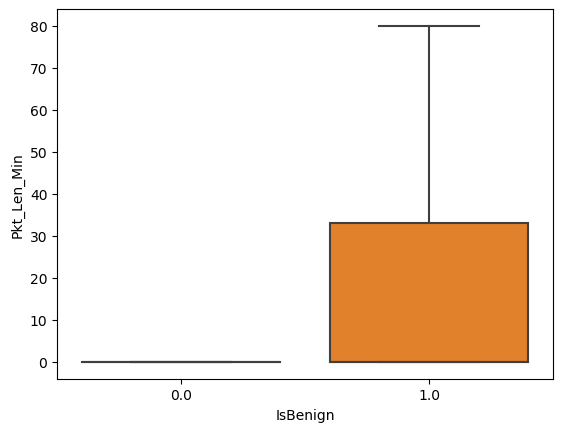

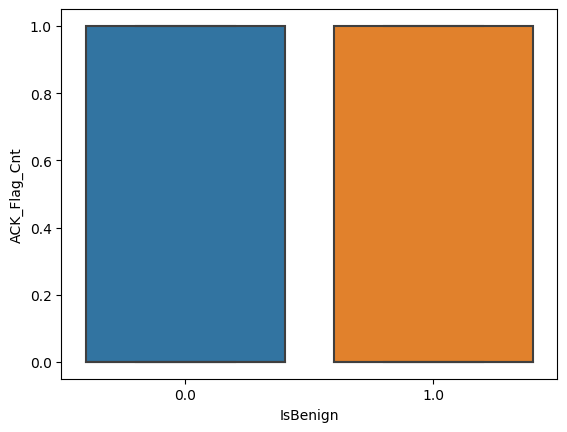

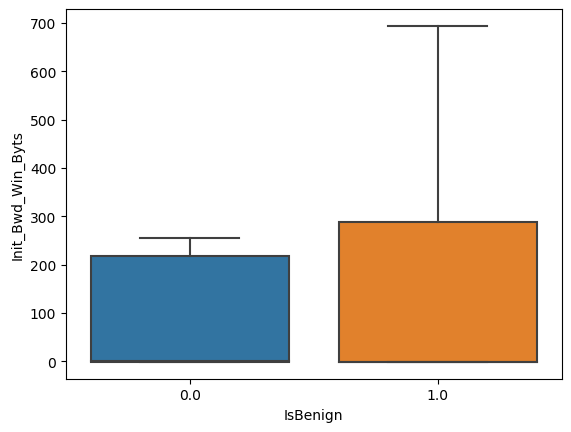

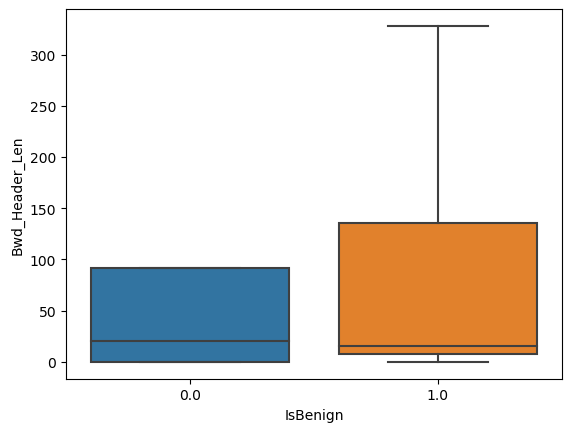

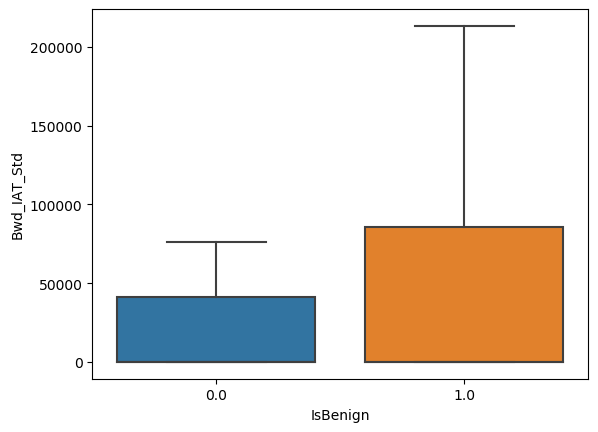

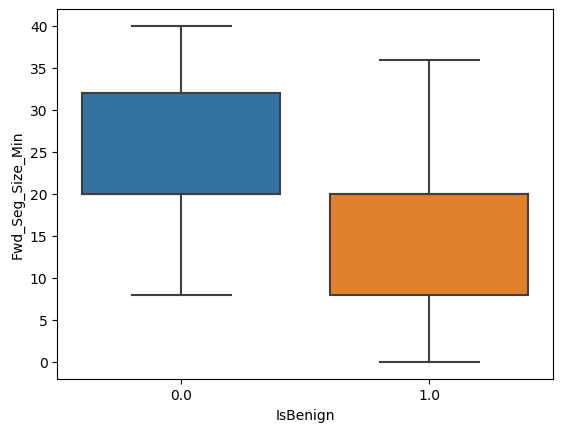

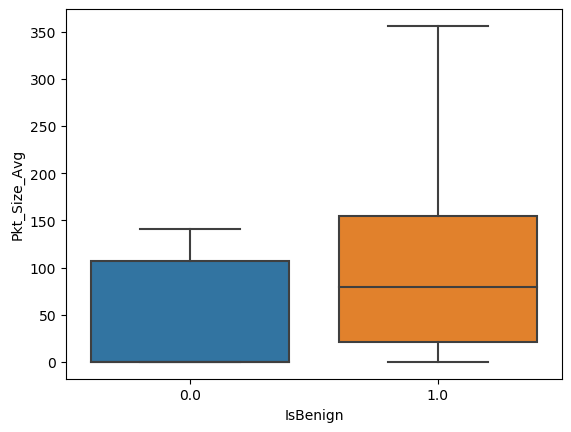

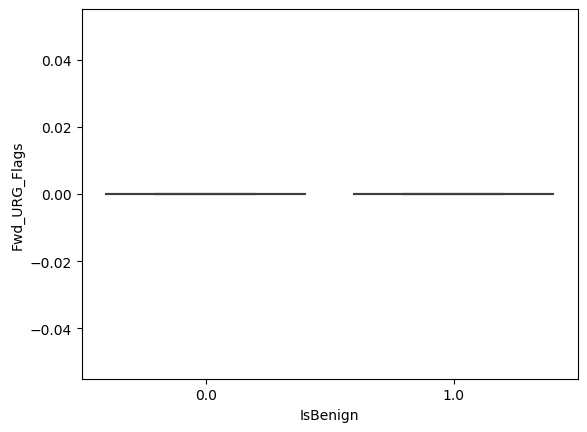

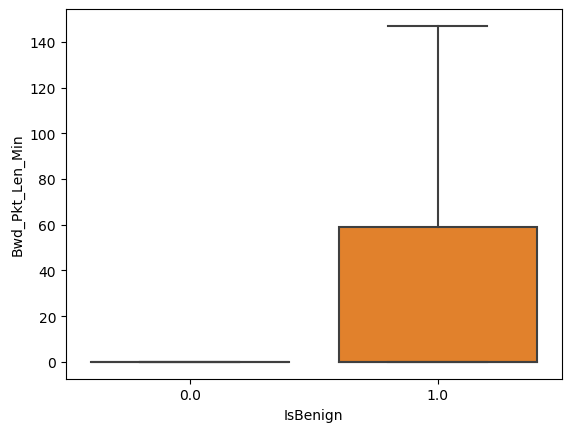

In [14]:
import seaborn as sns

for i in df_convert.columns:
    sns.boxplot(data=df_convert, y=i, x="IsBenign", showfliers=False) #sem outliers
    plt.show()

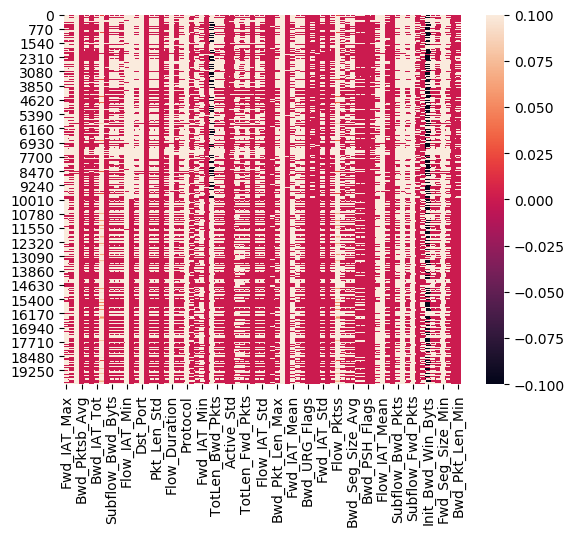

In [20]:
sns.heatmap(data = df_convert) 
plt.show()